## Elijah Bjork Python Demonstration

Using the website Kaggle, I found a dataset containing the salaries, job_title, and location of positions in cyber security accross the world. I am interested in pursuing a career in cyber security. Below, I have written code to answer questions I have about the infosec industry.

In [1]:
import pandas as pd
filepath = './salaries_cyber.csv' #if you saved the file in a different directory, please replace the path with the path to the file location
df = pd.read_csv(filepath)

In [2]:
#About data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


### BQ1: What are the top and bottom 10 salaries and job position paid in US dollars?

I am, of course, primarily interested in salary. This section gives me a general idea of what salaries are like.

In [3]:
bq1_df = df[df['employee_residence'] == 'US']

bq1_df = bq1_df[['salary', 'job_title', 'experience_level']]

print(bq1_df.nlargest(10, "salary"))
print(bq1_df.nsmallest(10, "salary"))

      salary                           job_title experience_level
647   600000           Incident Response Manager               SE
886   600000        Security Engineering Manager               EX
523   500000                 Security Researcher               SE
1106  450000             Staff Security Engineer               SE
1214  400000  Chief Information Security Officer               EX
814   375000  Chief Information Security Officer               EX
566   360000                  Detection Engineer               SE
404   325000      Information Security Architect               EX
715   320000          Software Security Engineer               MI
832   320000       Information Security Engineer               SE
      salary                     job_title experience_level
303    30000      Security DevOps Engineer               SE
691    30000  Information Security Analyst               EN
1112   30000  Information Security Analyst               MI
893    31000           IT Security

### BQ2: What is the median Salary for an entry level professional in the US?

Within the next five years, I hope to start an job in infosec. This will be an entry level position. I want to know what I can expect as a salary for these initial jobs.

In [4]:
bq2_df = df[df['experience_level'] == 'EN']

print(bq2_df[['salary']].median())

salary    70000.0
dtype: float64


### BQ3: What are the job titles available?

In the long run, I want to be in cyber forensics or in incident response. It is good for me to be aware of all the positions available, especially those performing the roles I want.

In [5]:
bq3_df = df[['job_title', 'salary']]
bq3_df = bq3_df.groupby(["job_title"]).median()

print(bq3_df.to_string())

                                              salary
job_title                                           
Application Security Analyst                 60750.0
Application Security Architect              315000.0
Application Security Engineer               109000.0
Application Security Specialist              85000.0
Azure Security Engineer                      60000.0
Chief Information Security Officer          136000.0
Cloud Security Architect                    110000.0
Cloud Security Engineer                     130000.0
Cloud Security Engineering Manager           52500.0
Computer Forensic Software Engineer         122000.0
Concierge Security Engineer                 115000.0
Corporate Infrastructure Security Engineer  140000.0
Corporate Security Engineer                 180000.0
Cyber Program Manager                        63000.0
Cyber Security Analyst                       80100.0
Cyber Security Architect                    129000.0
Cyber Security Consultant                    9

### BQ4: How many employees work for a company in a country not their own?
This is purely for my own curiosity. I wanted to know how many professionals work across borders. I also included what currency they are paid in. I think it is interesting how that is negotiated. 

In [6]:
bq4_df = df[df['employee_residence'] != df['company_location']]

print('Count: {}'.format(bq4_df['employee_residence'].count()))
print(bq4_df[['company_location', 'employee_residence', 'salary_currency']].to_string())

Count: 58
     company_location employee_residence salary_currency
9                  SG                 TW             USD
58                 CH                 US             USD
112                US                 CA             CAD
162                JP                 US             USD
178                US                 PK             USD
179                US                 IN             USD
354                BR                 IN             INR
357                US                 GH             USD
363                US                 ES             USD
383                ES                 AR             USD
392                AQ                 BR             BRL
397                US                 CA             CAD
399                AX                 AF             USD
440                US                 FR             EUR
461                CA                 BR             USD
500                US                 CA             CAD
531                NO

### BQ5: What is the distribution of salaries?
These charts provide a better understanding of compensation for infosec professionals. I printed out the percentiles, then created two box plots. The first shows all of the data on the chart. The many high outlier points made seeing the distribution difficult, so I added a second chart with a limited range.

  0th percentile: 2000.0
 25th percentile: 74594.5
 50th percentile: 110000.0
 75th percentile: 150000.0
100th percentile: 910991.0


<AxesSubplot:title={'center':'Y: 0 through 275000'}>

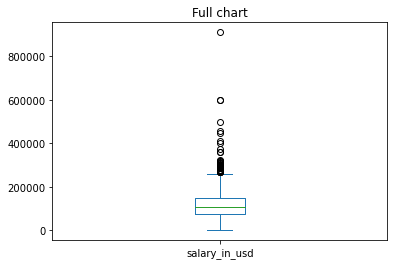

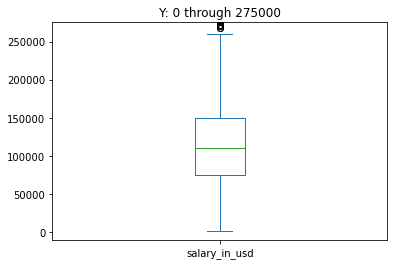

In [7]:
bq5_df = df[["salary_in_usd"]]

for percentile in [0, .25, .50, .75, 1]:
    print('{}th percentile: {}'.format(str(int(percentile * 100)).rjust(3), bq5_df.quantile(percentile)[0]))
    

bq5_df.plot.box(column="salary_in_usd", title="Full chart")
bq5_df.plot.box(column="salary_in_usd", title="Y: 0 through 275000", ylim=(-10000, 275000))